In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnsit = fetch_mldata("MNIST original")

In [3]:
mnsit

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
mnsit["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
X, y = mnsit["data"], mnsit["target"]

In [6]:
%matplotlib inline

In [7]:
import matplotlib

In [8]:
import matplotlib.pyplot as plt

In [9]:
some_digit=X[1234]

(-0.5, 27.5, 27.5, -0.5)

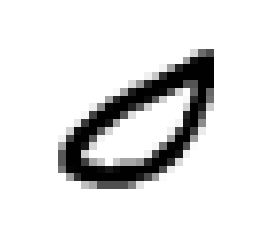

In [10]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [11]:
plt.show()

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
y_train_5 = (y_train == 5 )
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier
sdg_clf = SGDClassifier(random_state = 42)
sdg_clf.fit(X_train, y_train_5)

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
sdg_clf.predict([some_digit])

array([False], dtype=bool)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(sdg_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 0.8835233 ,  0.86769338,  0.87373106])

In [19]:
from sklearn.base import BaseEstimator

In [20]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([ 0.91066667,  0.91141667,  0.90983333,  0.90508333,  0.91125   ])

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_train_pred = cross_val_predict(sdg_clf, X_train, y_train, cv=3)

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [25]:
y_train_pred

array([ 5.,  6.,  7., ...,  1.,  4.,  1.])

In [26]:
y_train_5

array([ True,  True, False, ..., False, False, False], dtype=bool)

In [27]:
y_train_pred = (y_train_pred == 5)

In [28]:
y_train_pred

array([ True, False, False, ..., False, False, False], dtype=bool)

In [29]:
precision_score(y_train_5, y_train_pred)

0.79875437913585057

In [30]:
recall_score(y_train_5, y_train_pred)

0.75705589374654125

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_5, y_train_pred)

0.77734633961549382

In [33]:
y_scores = sdg_clf.decision_function([some_digit])

In [34]:
y_scores

array([-71201.42276464])

In [35]:
threshold = 0

In [36]:
y_some_digit_pred = (y_scores> threshold)

In [37]:
y_some_digit_pred

array([False], dtype=bool)

In [38]:
y_scores_val = cross_val_predict(sdg_clf, X_train, y_train_5, cv=5, method="decision_function")

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
print(y_scores_val.shape[0])

60000


In [41]:
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_val)

In [42]:
from sklearn.metrics import roc_curve

In [43]:
y_scores = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3, method="decision_function")

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [44]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [45]:
def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr, tpr, linewidth=2, label=lable)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true, positive rate')
    plt.show()

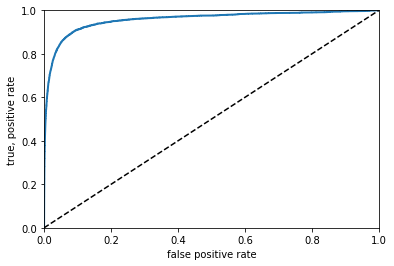

In [46]:
plot_roc_curve(fpr=fpr, tpr=tpr)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest_clf = RandomForestClassifier(random_state = 42)

In [49]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 4, method="predict_proba")

In [50]:
y_scores_forest = y_probas_forest[:,1]

In [51]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

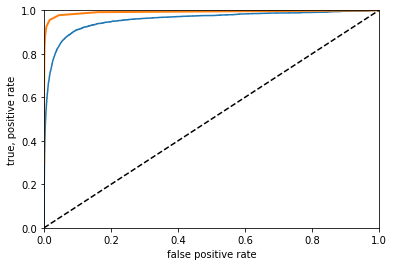

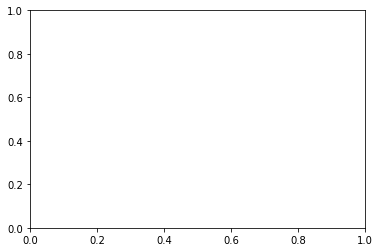

In [52]:
plt.plot(fpr, tpr)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="low right")
plt.show()

In [53]:
sdg_clf.fit(X_train, y_train)

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [54]:
sdg_clf.predict([some_digit])

array([ 0.])

In [55]:
some_digit_scores = sdg_clf.decision_function([some_digit])

In [56]:
some_digit_scores

array([[  355488.50989619,  -778850.56100888,  -508494.85421319,
         -300973.26262112,  -239878.85974398,   -71201.42276464,
         -493485.53869841,  -153938.61186724,  -837130.39537145,
        -1049849.69487427]])

In [57]:
np.argmax(some_digit_scores)

0

In [58]:
sdg_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [59]:
from sklearn.multiclass import OneVsOneClassifier

In [60]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [61]:
ovo_clf.fit(X_train, y_train)

/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zero/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [62]:
ovo_clf.predict([some_digit])

array([ 0.])

In [63]:
len(ovo_clf.estimators_)

45

In [64]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
forest_clf.predict([some_digit])

array([ 0.])

In [66]:
forest_clf.predict_proba([some_digit])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [69]:
y_multilabel

array([[False,  True],
       [False,  True],
       [ True,  True],
       ..., 
       [ True,  True],
       [False, False],
       [False,  True]], dtype=bool)

In [70]:
knn_clf = KNeighborsClassifier()

In [71]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  41, 148, 177,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [73]:
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

In [74]:
knn_clf.predict([X[5506]])

array([[False, False]], dtype=bool)

In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)

KeyboardInterrupt: 